In [1]:
import pandas as pd
import numpy as np
import shap

In [2]:
df = pd.read_pickle("../sybil_features_all_addresses.pickle")
df

,tx_count,active_days,lifetime_days,mean_tx_interval,median_tx_interval,std_tx_interval,max_tx_interval,fast_tx_ratio,short_interval_ratio,tx_per_day,...,peak_hour,peak_hour_ratio,hour_entropy,weekend_tx_ratio,unique_tx_types,tx_type_entropy,confirmations_mean,confirmations_std,low_conf_ratio,address
0,20,7,77.844190,3.539862e+05,2924.0,7.086010e+05,2544743.0,0.200000,0.250000,2.857143,...,4,0.350000,1.915765,0.050000,3,0.730588,1.501222e+08,6.539440e+07,0.250000,0xd6614286c4fdbdd4d39f153fc13b53368b3bd0b8
1,24,6,272.470127,1.023540e+06,170.0,4.696790e+06,22562155.0,0.291667,0.416667,4.000000,...,10,0.416667,1.517852,0.416667,3,1.063521,1.445570e+08,9.189451e+07,0.250000,0x01e1b85434391d6965de8b35acbb8884059afae7
2,145,44,478.125579,2.868753e+05,268.5,1.085975e+06,10794773.0,0.082759,0.172414,3.295455,...,18,0.186207,2.632444,0.558621,3,0.649059,1.738306e+08,7.258849e+07,0.248276,0xf0c58b786a35c767682c907a82ba5455490b3591
3,54,17,173.653148,2.830874e+05,28.0,1.052020e+06,6980659.0,0.370370,0.518519,3.176471,...,8,0.240741,2.271567,0.351852,3,0.979288,2.105488e+08,8.317516e+07,0.240741,0xed313446dbfbec87900fe0a7dfde688f744a3819
4,308,42,533.474502,1.501374e+05,47.0,6.986825e+05,7339859.0,0.275974,0.545455,7.333333,...,5,0.250000,2.317984,0.577922,3,0.909097,1.859688e+08,8.184623e+07,0.246753,0xdb686a9b77bc516a5fce6307a6ca58f6cbde1e3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56891,596,73,267.778924,3.888420e+04,91.0,2.005161e+05,2985210.0,0.208054,0.439597,8.164384,...,19,0.184564,2.395846,0.337248,3,0.961837,1.434240e+08,6.525561e+07,0.250000,0xe0768e83840e09dc85c53833a9d3b4d16185fcfb
56892,108,26,377.828843,3.050880e+05,191.0,9.954825e+05,7303444.0,0.240741,0.425926,4.153846,...,12,0.351852,2.156182,0.157407,3,0.876516,1.849920e+08,6.498987e+07,0.250000,0xdb433bc5d23f2cdbdfcd96a0dcb73891b5f122d6
56893,240,56,810.174595,2.928832e+05,39.0,1.524632e+06,21399012.0,0.383333,0.533333,4.285714,...,7,0.150000,2.651510,0.345833,3,0.929510,2.031344e+08,8.090620e+07,0.250000,0x1d5e033ae2aa830bf7621c6349e0a00e3e071402
56894,434,67,148.937326,2.971867e+04,45.0,9.770210e+04,1107368.0,0.301843,0.534562,6.477612,...,8,0.135945,2.675979,0.278802,3,0.872723,1.224184e+08,3.990044e+07,0.251152,0xe98f0276a5f59c2b54886a17b0a2fac717915510


In [3]:
df2 = pd.read_pickle("../etherscan_sybil_features_all_addresses.pickle")
df2.columns = [col + "_eth" for col in df2.columns]
df2

,tx_count_eth,active_days_eth,lifetime_days_eth,mean_tx_interval_eth,median_tx_interval_eth,std_tx_interval_eth,max_tx_interval_eth,fast_tx_ratio_eth,short_interval_ratio_eth,tx_per_day_eth,...,peak_hour_eth,peak_hour_ratio_eth,hour_entropy_eth,weekend_tx_ratio_eth,unique_tx_types_eth,tx_type_entropy_eth,confirmations_mean_eth,confirmations_std_eth,low_conf_ratio_eth,address_eth
0,25,7,125.068194,4.502455e+05,120.0,1.101902e+06,4064292.0,0.200000,0.360000,3.571429,...,18,0.480000,1.561577,0.000000,3,6.004829e-01,2.930776e+06,6.736516e+05,0.200000,0x95eb4622d1d43c37098cc1fc428e89cf924a78e1
1,8,4,276.596389,3.413990e+06,6240.0,8.670543e+06,23066340.0,0.000000,0.000000,2.000000,...,10,0.750000,0.735622,0.000000,1,-1.000000e-09,3.708535e+06,1.036286e+06,0.250000,0xbb52a06b42e29ccbfc80268d79f3402fb92a2d62
2,23,6,112.435972,4.415667e+05,108.0,1.142437e+06,4658616.0,0.173913,0.478261,3.833333,...,23,0.695652,1.003166,0.217391,3,4.702360e-01,2.572848e+06,8.720021e+05,0.260870,0x851742d6ef40989e2f542b3d1b9716ede9349bd1
3,22,9,411.687361,1.693799e+06,300.0,5.020174e+06,22750584.0,0.227273,0.272727,2.444444,...,2,0.272727,1.744791,0.045455,3,7.088329e-01,4.570214e+06,1.513869e+06,0.272727,0xd16c79889d390fd60a433b255954d5ce997ae439
4,157,61,563.610000,3.121532e+05,1650.0,8.503563e+05,7494144.0,0.171975,0.242038,2.573770,...,7,0.108280,2.835187,0.292994,3,6.722535e-01,4.125646e+06,1.792451e+06,0.248408,0x97d16c85c38b8675174c614e6b403c404a9834a5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,352,88,849.754826,2.091704e+05,192.0,1.103531e+06,19020647.0,0.343750,0.383523,4.000000,...,3,0.142045,2.608321,0.309659,3,8.785772e-01,5.257143e+06,2.004967e+06,0.250000,0xa0e328f9cabb36f9f45904af9651ed32314e9f2a
19736,59,30,761.434861,1.134275e+06,31154.0,3.713481e+06,26721240.0,0.067797,0.101695,1.966667,...,14,0.118644,2.471023,0.305085,3,6.898961e-01,5.415421e+06,2.626183e+06,0.254237,0x8a8882711557a07e64469c2d56d7544d16e9f310
19737,15,7,268.965972,1.659904e+06,16728.0,3.274617e+06,11470104.0,0.000000,0.000000,2.142857,...,3,0.400000,1.714088,0.000000,2,5.004024e-01,3.082086e+06,1.724266e+06,0.266667,0x42f52b8d3f7c78524330fe0c2a34e338214a348b
19738,13,5,232.918472,1.677013e+06,2736.0,5.205812e+06,18155352.0,0.076923,0.153846,2.600000,...,7,0.461538,1.484458,0.538462,2,4.293230e-01,3.475467e+06,8.134017e+05,0.230769,0x2967ca56d43957963f88da98850be610800163ac


In [4]:
df = (
    df.merge(df2, left_on="address", right_on="address_eth", how="right")
    .drop(columns=["address_eth"])
    .fillna(-100000)
)
df

,tx_count,active_days,lifetime_days,mean_tx_interval,median_tx_interval,std_tx_interval,max_tx_interval,fast_tx_ratio,short_interval_ratio,tx_per_day,...,duplicate_tx_ratio_eth,peak_hour_eth,peak_hour_ratio_eth,hour_entropy_eth,weekend_tx_ratio_eth,unique_tx_types_eth,tx_type_entropy_eth,confirmations_mean_eth,confirmations_std_eth,low_conf_ratio_eth
0,22.0,6.0,68.791493,283027.857143,36.0,8.923364e+05,3624508.0,0.363636,0.545455,3.666667,...,0.000000,18,0.480000,1.561577,0.000000,3,6.004829e-01,2.930776e+06,6.736516e+05,0.200000
1,75.0,26.0,314.972350,367751.500000,58.0,1.332523e+06,10717495.0,0.306667,0.493333,2.884615,...,0.000000,10,0.750000,0.735622,0.000000,1,-1.000000e-09,3.708535e+06,1.036286e+06,0.250000
2,31.0,11.0,107.497280,309592.166667,197.0,6.059790e+05,2510137.0,0.032258,0.225806,2.818182,...,0.000000,23,0.695652,1.003166,0.217391,3,4.702360e-01,2.572848e+06,8.720021e+05,0.260870
3,140.0,27.0,511.023958,317643.669065,20.0,1.056984e+06,8121958.0,0.371429,0.607143,5.185185,...,0.000000,2,0.272727,1.744791,0.045455,3,7.088329e-01,4.570214e+06,1.513869e+06,0.272727
4,1876.0,219.0,576.521516,26566.111467,29.0,1.763328e+05,5457972.0,0.349147,0.586354,8.566210,...,0.000000,7,0.108280,2.835187,0.292994,3,6.722535e-01,4.125646e+06,1.792451e+06,0.248408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,1158.0,103.0,854.137014,63783.438202,11.0,3.631593e+05,6408710.0,0.486183,0.684801,11.242718,...,0.000000,3,0.142045,2.608321,0.309659,3,8.785772e-01,5.257143e+06,2.004967e+06,0.250000
19736,589.0,102.0,761.260012,111858.613946,31.0,4.858528e+05,6688919.0,0.431239,0.556876,5.774510,...,0.000000,14,0.118644,2.471023,0.305085,3,6.898961e-01,5.415421e+06,2.626183e+06,0.254237
19737,60.0,16.0,347.957407,509551.186441,1163.0,2.585767e+06,19602183.0,0.233333,0.350000,3.750000,...,0.000000,3,0.400000,1.714088,0.000000,2,5.004024e-01,3.082086e+06,1.724266e+06,0.266667
19738,40.0,10.0,177.954711,394238.128205,73.0,1.289534e+06,7686049.0,0.250000,0.425000,4.000000,...,0.000000,7,0.461538,1.484458,0.538462,2,4.293230e-01,3.475467e+06,8.134017e+05,0.230769


In [5]:
np.random.seed(42)  # Чтобы результаты были воспроизводимыми
df["noise_feature"] = np.random.normal(loc=0, scale=1, size=len(df))

In [6]:
df_target = pd.read_pickle("../df_addresses.pickle").drop(
    columns=["index", "airdropped_tokens"]
)
df_target["sybil"] = (df_target["get_drop"] - 1).abs()
df_target = df_target.drop(columns="get_drop")
df_target

,user,sybil
0,0x934204e4617792b8ec2a34f0330a19ab3393041f,1
1,0xa99979dca47c7c41262936521d59d9a922f7a1d2,1
2,0x5fc7b11e3281b7404573465bc99d9aebc87ec59b,1
3,0x7c56d095261c0c9921adf95212f499018340bdde,0
4,0xa33f601b04ba846586266bfae01ae47d5362eff4,0
...,...,...
745228,0x5e73cf9cebd82d8c192f538f41186b55965e6fc6,0
745229,0x335b7c6633a29e43dbe2f7804803cc8243f2a830,0
745230,0xecebbda750e02674eab8929c69e9de5b30c4446f,0
745231,0x45d1d1124a10dafdf0fe6c6e12a1dea9c1c6db25,0


In [7]:
df = df.merge(df_target, left_on="address", right_on="user", how="inner").drop(
    columns=["user"]
)
df

,tx_count,active_days,lifetime_days,mean_tx_interval,median_tx_interval,std_tx_interval,max_tx_interval,fast_tx_ratio,short_interval_ratio,tx_per_day,...,peak_hour_ratio_eth,hour_entropy_eth,weekend_tx_ratio_eth,unique_tx_types_eth,tx_type_entropy_eth,confirmations_mean_eth,confirmations_std_eth,low_conf_ratio_eth,noise_feature,sybil
0,22.0,6.0,68.791493,283027.857143,36.0,8.923364e+05,3624508.0,0.363636,0.545455,3.666667,...,0.480000,1.561577,0.000000,3,6.004829e-01,2.930776e+06,6.736516e+05,0.200000,0.496714,0
1,75.0,26.0,314.972350,367751.500000,58.0,1.332523e+06,10717495.0,0.306667,0.493333,2.884615,...,0.750000,0.735622,0.000000,1,-1.000000e-09,3.708535e+06,1.036286e+06,0.250000,-0.138264,0
2,31.0,11.0,107.497280,309592.166667,197.0,6.059790e+05,2510137.0,0.032258,0.225806,2.818182,...,0.695652,1.003166,0.217391,3,4.702360e-01,2.572848e+06,8.720021e+05,0.260870,0.647689,0
3,140.0,27.0,511.023958,317643.669065,20.0,1.056984e+06,8121958.0,0.371429,0.607143,5.185185,...,0.272727,1.744791,0.045455,3,7.088329e-01,4.570214e+06,1.513869e+06,0.272727,1.523030,0
4,1876.0,219.0,576.521516,26566.111467,29.0,1.763328e+05,5457972.0,0.349147,0.586354,8.566210,...,0.108280,2.835187,0.292994,3,6.722535e-01,4.125646e+06,1.792451e+06,0.248408,-0.234153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1158.0,103.0,854.137014,63783.438202,11.0,3.631593e+05,6408710.0,0.486183,0.684801,11.242718,...,0.142045,2.608321,0.309659,3,8.785772e-01,5.257143e+06,2.004967e+06,0.250000,-1.412259,0
19346,589.0,102.0,761.260012,111858.613946,31.0,4.858528e+05,6688919.0,0.431239,0.556876,5.774510,...,0.118644,2.471023,0.305085,3,6.898961e-01,5.415421e+06,2.626183e+06,0.254237,2.360882,0
19347,60.0,16.0,347.957407,509551.186441,1163.0,2.585767e+06,19602183.0,0.233333,0.350000,3.750000,...,0.400000,1.714088,0.000000,2,5.004024e-01,3.082086e+06,1.724266e+06,0.266667,0.877362,1
19348,40.0,10.0,177.954711,394238.128205,73.0,1.289534e+06,7686049.0,0.250000,0.425000,4.000000,...,0.461538,1.484458,0.538462,2,4.293230e-01,3.475467e+06,8.134017e+05,0.230769,-1.777976,1


# Учим черновую модель

In [8]:
from catboost import Pool, cv
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
X = df.drop(["address", "sybil"], axis=1)
y = df["sybil"]
data_pool = Pool(X, y)

# 2. Параметры и кросс-валидация с сохранением моделей
params = {
    "loss_function": "Logloss",
    "use_best_model": True,
    "eval_metric": "AUC",
    "custom_metric": ["Accuracy", "Precision", "Recall", "F1", "AUC", "MCC"],
    "random_seed": 42,
    "depth": 8,  # 6 #7 #8
    "learning_rate": 0.02,  # 0.05
    "l2_leaf_reg": 5,
    "iterations": 2000,  # 1000
    "verbose": False,
}

cv_results = cv(
    params=params,
    pool=data_pool,
    plot=True,
    fold_count=3,
    stratified=True,
    shuffle=True,
    return_models=True,
    early_stopping_rounds=50,
    verbose=False,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 0.8874763608
bestIteration = 1988

Training on fold [1/3]


Number of the positive class predictions is 0. Setting Precision metric value to the default 0



bestTest = 0.9034736283
bestIteration = 1999

Training on fold [2/3]

bestTest = 0.8886324648
bestIteration = 1740



In [11]:
np.mean(y)

np.float64(0.1889922480620155)

In [9]:
selected_features = []
for model in cv_results[1]:
    feature_importances = model.get_feature_importance(prettified=True)
    feature_importances.columns = ["feature", "importance"]

    # Ищем importance у 'noise_feature'
    noise_importance = feature_importances[
        feature_importances["feature"] == "noise_feature"
    ]["importance"].values[0]

    # Оставляем только те фичи, у которых важность больше, чем у noise_feature
    selected_features += [
        list(
            feature_importances[feature_importances["importance"] > noise_importance][
                "feature"
            ]
        )
    ]

intersection = set(selected_features[0])
for lst in selected_features[1:]:
    intersection &= set(lst)

print(len(intersection))
intersection

49


{'confirmations_mean',
 'confirmations_mean_eth',
 'confirmations_std',
 'confirmations_std_eth',
 'contract_call_ratio',
 'distinct_contract_ratio',
 'fast_tx_ratio',
 'gas_used_ratio_mean',
 'gas_used_ratio_mean_eth',
 'hour_entropy',
 'hour_entropy_eth',
 'lifetime_days',
 'max_nonce_gap',
 'max_nonce_gap_eth',
 'max_tx_interval',
 'mean_gas_bid_ratio',
 'mean_gas_eth_eth',
 'mean_gas_price',
 'mean_gas_price_eth',
 'mean_nonce_gap',
 'mean_nonce_gap_eth',
 'median_tx_interval',
 'median_tx_interval_eth',
 'median_value_eth',
 'median_value_eth_eth',
 'most_common_value_eth',
 'most_common_value_ratio',
 'most_common_value_ratio_eth',
 'net_value_eth',
 'net_value_eth_eth',
 'out_in_ratio',
 'out_in_ratio_eth',
 'outgoing_value_eth',
 'outgoing_value_eth_eth',
 'peak_hour',
 'receiver_per_tx',
 'receiver_per_tx_eth',
 'short_interval_ratio',
 'short_interval_ratio_eth',
 'std_gas_eth_eth',
 'std_gas_price',
 'std_gas_price_eth',
 'token_tx_ratio',
 'tx_per_day',
 'tx_per_day_eth',
 

# Учим нечерновую модель

In [10]:
from catboost import Pool, cv
import pandas as pd

# 1. Загрузка данных
X = df.drop(["address", "sybil"], axis=1)[list(intersection)]
y = df["sybil"]
data_pool = Pool(X, y)

# 2. Параметры и кросс-валидация с сохранением моделей
params = {
    "loss_function": "Logloss",
    "use_best_model": True,
    "eval_metric": "AUC",
    "custom_metric": ["Accuracy", "Precision", "Recall", "F1", "AUC", "MCC"],
    "random_seed": 42,
    "depth": 8,  # 6 #7 #8
    "learning_rate": 0.01,  # 0.05
    "l2_leaf_reg": 3,
    "iterations": 6000,  # 1000
    "verbose": False,
}

cv_results = cv(
    params=params,
    pool=data_pool,
    plot=True,
    fold_count=5,
    stratified=True,
    shuffle=True,
    return_models=True,
    early_stopping_rounds=500,
    verbose=False,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8975392428
bestIteration = 5986

Training on fold [1/5]

bestTest = 0.903690483
bestIteration = 5847

Training on fold [2/5]

bestTest = 0.9085613279
bestIteration = 5972

Training on fold [3/5]

bestTest = 0.9164628633
bestIteration = 5977

Training on fold [4/5]

bestTest = 0.9017833555
bestIteration = 5937



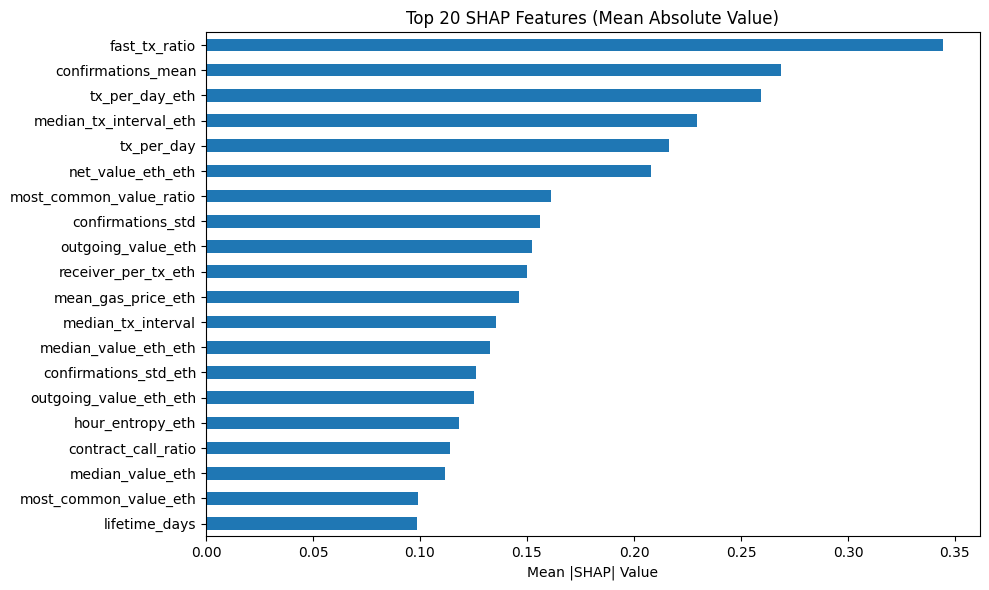

SHAP summary plot for first fold model:


/tmp/ipykernel_7014/191569067.py:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, max_display=20)


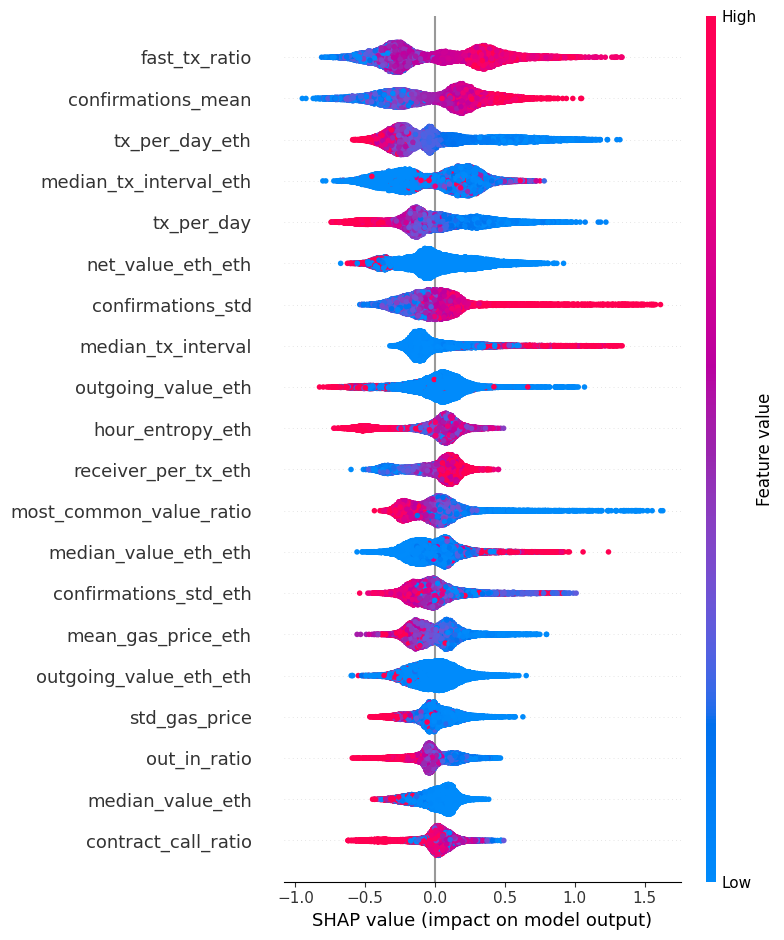

In [11]:
models = cv_results[1]

# 3. Вычисление SHAP значений и агрегация
shap_values_all = []
for model in models:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap_values_all.append(np.abs(shap_values))  # абсолютные значения SHAP

# 4. Среднее значение SHAP по фолдам
shap_values_mean = np.mean(shap_values_all, axis=0)  # по фолдам
shap_df = pd.DataFrame(shap_values_mean, columns=X.columns)
shap_importance = shap_df.mean().sort_values(ascending=False)

# 5. Визуализация: Bar-график важности признаков
top_n = 20
plt.figure(figsize=(10, 6))
shap_importance.head(top_n).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} SHAP Features (Mean Absolute Value)")
plt.xlabel("Mean |SHAP| Value")
plt.tight_layout()
plt.show()

# 6. (Опционально) SHAP summary plot на одной модели (например, 1-й фолд)
print("SHAP summary plot for first fold model:")
explainer = shap.TreeExplainer(models[0])
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, max_display=20)

Bar plot saved to shap_importance.png


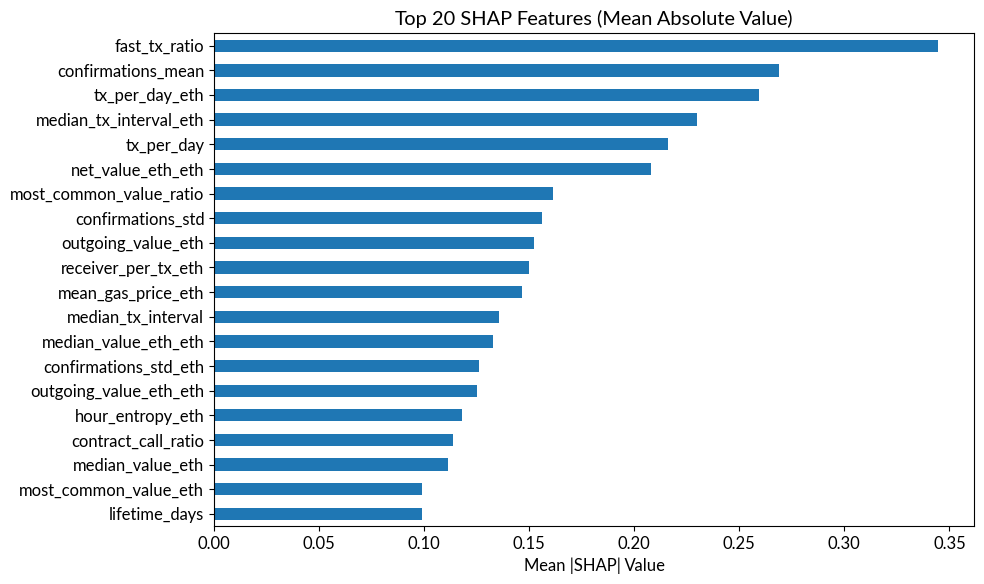

/tmp/ipykernel_7014/2875128114.py:62: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, max_display=20, show=False)


Summary plot saved to shap_summary.png


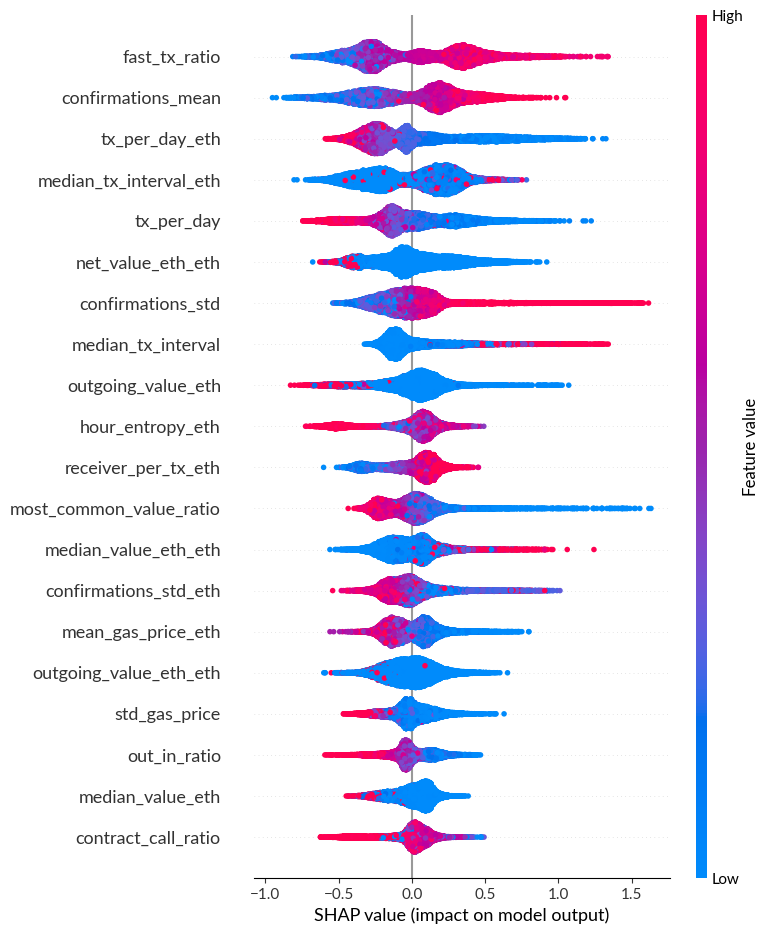

In [12]:
import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. Указываем директорию с Lato (где у вас лежат .ttf)
lato_dir = "/usr/share/fonts/truetype/lato"

# 2. Регистрируем все .ttf из этой папки в текущей сессии Matplotlib
for fname in os.listdir(lato_dir):
    if fname.lower().endswith(".ttf"):
        fm.fontManager.addfont(os.path.join(lato_dir, fname))

# 3. (Опционально) Если вы хотите полностью пересоздать список шрифтов:
#    более «грубый» способ — собрать список заново только из вашей папки Lato,
#    но это заменит весь список шрифтов:
# all_fonts = fm.findSystemFonts(fontpaths=[lato_dir], fontext='ttf')
# fm.fontManager.ttflist = fm.createFontList(all_fonts)

# 4. Теперь можно смело указывать Lato в rcParams
plt.rcParams["font.family"] = "Lato"
plt.rcParams["font.sans-serif"] = ["Lato"]
plt.rcParams["font.size"] = 12
# 1. Допустим, у вас уже есть models = cv_results[1] и матрица X

# # 2. Расчёт SHAP и агрегация по фолдам
# shap_values_all = []
# for model in models:
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X)
#     shap_values_all.append(np.abs(shap_values))

# shap_values_mean = np.mean(shap_values_all, axis=0)
# shap_df = pd.DataFrame(shap_values_mean, columns=X.columns)
# shap_importance = shap_df.mean().sort_values(ascending=False)

# 3. Визуализация: Bar-график важности признаков
top_n = 20
fig, ax = plt.subplots(figsize=(10, 6))
shap_importance.head(top_n).plot(kind="barh", ax=ax)
ax.invert_yaxis()
ax.set_title(f"Top {top_n} SHAP Features (Mean Absolute Value)", fontfamily="Lato")
ax.set_xlabel("Mean |SHAP| Value", fontfamily="Lato")
plt.tight_layout()

# 4. Сохранение с прозрачным фоном
output_path = "shap_importance.png"
fig.savefig(output_path, dpi=300, transparent=True)
print(f"Bar plot saved to {output_path}")

# 5. Отобразить на экране (опционально)
plt.show()

# 6. SHAP summary plot для первой модели
explainer = shap.TreeExplainer(models[0])
shap_values = explainer.shap_values(X)

# Можно также задать больший размер фигуры и шрифт через rcParams
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, max_display=20, show=False)
plt.tight_layout()

# Сохранение summary-plot
summary_path = "shap_summary.png"
plt.savefig(summary_path, dpi=300, transparent=True)
print(f"Summary plot saved to {summary_path}")

# И, при желании, отобразить
plt.show()